# Mushroom Classifier

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


# Import Data

In [2]:
original_data = pd.read_csv('mushrooms.csv')

In [3]:
data = original_data.copy()

# Data Analysis

In [26]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


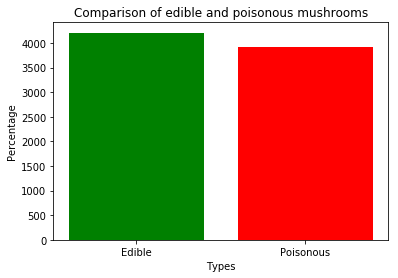

In [27]:
plt.bar(["Edible","Poisonous"], [class_dist[0],class_dist[1]], color=['green', 'red'])
plt.xlabel("Types")
plt.ylabel("Percentage")
plt.title("Comparison of edible and poisonous mushrooms")
plt.show()


In [28]:
habitat_dist = pd.value_counts(data['habitat'])
habitat_dist

d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64

In [29]:
class_dist = pd.value_counts(data['class'])
class_dist

0    4208
1    3916
Name: class, dtype: int64

In [10]:
print('%.2f%% of all the mushrooms are edible.' %(class_dist[0]/sum(class_dist)*100))

51.80% of all the mushrooms are edible.


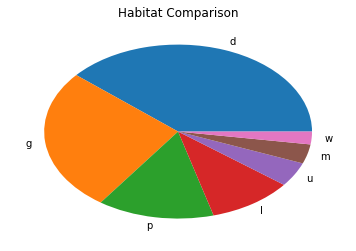

In [11]:
values = [habitat_dist[0],habitat_dist[1],habitat_dist[2],habitat_dist[3],habitat_dist[4],habitat_dist[5],habitat_dist[6]]
lb = ["d","g","p","l","u","m","w"]
plt.pie(values, labels=lb)
plt.title("Habitat Comparison")
plt.show()


In [12]:
#Obtain total number of mushrooms for each 'odor' (Entire DataFrame)
odor_dist = pd.value_counts(data['odor'])
odor_dist

n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

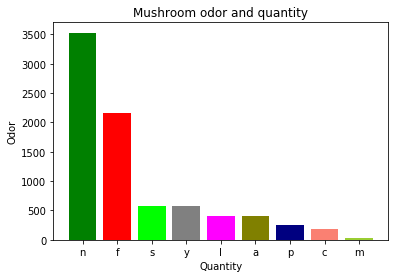

In [13]:
plt.bar(["n","f","s","y","l","a","p","c","m"], 
        [odor_dist[0], odor_dist[1], odor_dist[2], odor_dist[3], odor_dist[4], odor_dist[5], odor_dist[6],
         odor_dist[7], odor_dist[8]], 
        color=['green','red','lime','grey','fuchsia','olive','navy','salmon','yellowgreen'])
plt.xlabel("Quantity")
plt.ylabel("Odor")
plt.title("Mushroom odor and quantity")
plt.show()


In [14]:
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])

data.head(5)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [15]:
encoded_data = pd.get_dummies(data)

encoded_data.head(5)

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


# Creating Training & Testing Datasets

In [17]:
from sklearn.model_selection import train_test_split
y = data['class'].values.reshape(-1, 1)
X = encoded_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [20]:
logistIc_reg = LogisticRegression()
logistIc_reg.fit(X_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
y_prob = logistc_reg.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob > 0.5, 1, 0)

In [22]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)

confusion_matrix

array([[843,   0],
       [  0, 782]], dtype=int64)

In [23]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [24]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

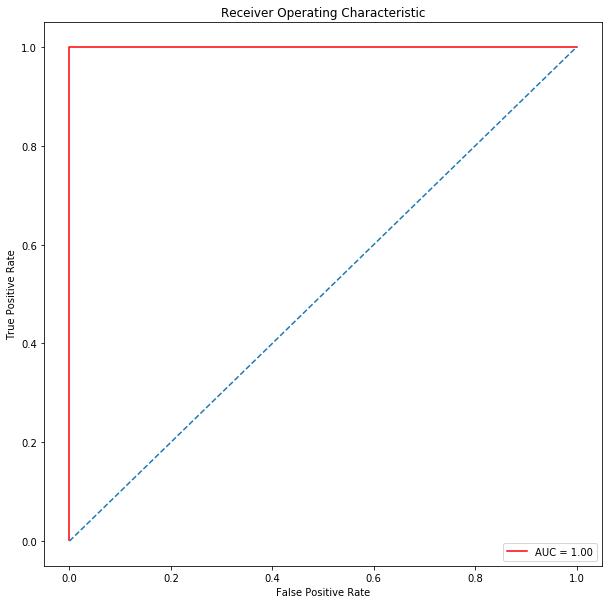

In [25]:
def plot_roc(roc_auc):
    plt.figure(figsize=(10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
plot_roc(roc_auc)
